# Unsupervised Learning - Vehicle Silhoutte Classification using PCA

## Purpose


The purpose is to classify a given silhouette as one of three types of vehicle, using a set of 
features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, 
Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with 
the expectation that the bus, van and either one of the cars would be readily distinguishable, 
but it would be more difficult to distinguish between the cars.


## Overview

##### Data Loading and missing value treatment 

a. Manual data inspection 

b. Import necessary packages 

c. Loading data set and Initial Analysis

d. Identify and replace missing values 


##### Attribute Analysis and suitability for PCA 

a. Analyze outliers through box plots 

b. Pairplot and Correlation Analysis 

c. Split the dataset into attributes and class

d. Standardize the data 


##### Principal Component Analysis  

a. Covariance Matrix  

b. Eigen vectors and Eigen values processing 

c. Consideration for dimensionality reduction 

d. Verify PCA correlation using Pair Plot


##### Models Building on chosen Principal Components 

a. Training & Test Split

b. Gaussian Naive Bayes Classifier

c. Support Vector Classifier basic 

d. Support Vector Classifier with Grid Search Cross Validation 

e. Inference about PCA Dimensionality Reduction and the Best Suited Model 


##### Manual data inspection:

Manual observation of dataset indicates only blank type of missing values for several attributes. 

##### Import of necessary packages

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To model the Support Vector classifier
from sklearn.svm import SVC

# To enable Grid search cross validation 
from sklearn.model_selection import GridSearchCV

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# To build the Confusion Matrix
from sklearn.metrics import confusion_matrix

# To report the prediction shape 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# To plot graphs (visualization)
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline 

##### Load Dataset and do Initial Analysis

In [2]:
Vehicle_df = pd.read_csv("vehicle.csv")

In [3]:
Vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
print(Vehicle_df.shape)

(846, 19)


In [5]:
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [ ]:
# All 18 attributes are numeric, while class is string 

In [6]:
Vehicle_df.groupby("class").size()

class
bus    218
car    429
van    199
dtype: int64

In [ ]:
# There is not much skew in the class variable 

##### Identify missing values 

In [7]:
print (Vehicle_df.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


##### Replacement of missing values using median 

In [8]:
# Replace 'circularity' using median 
median_circularity = Vehicle_df['circularity'].median()
print (median_circularity)
Vehicle_df['circularity'].fillna(median_circularity, inplace=True)

44.0


In [9]:
# Replace 'distance_circularity' using median 
median_distance_circularity = Vehicle_df['distance_circularity'].median()
print (median_distance_circularity)
Vehicle_df['distance_circularity'].fillna(median_distance_circularity, inplace=True)

80.0


In [10]:
# Replace 'radius_ratio' using median 
median_radius_ratio = Vehicle_df['radius_ratio'].median()
print (median_radius_ratio)
Vehicle_df['radius_ratio'].fillna(median_radius_ratio, inplace=True)

167.0


In [11]:
# Replace 'pr.axis_aspect_ratio' using median 
median_pr_axis_aspect_ratio = Vehicle_df['pr.axis_aspect_ratio'].median()
print (median_pr_axis_aspect_ratio)
Vehicle_df['pr.axis_aspect_ratio'].fillna(median_pr_axis_aspect_ratio, inplace=True)

61.0


In [12]:
# Replace 'scatter_ratio' using median 
median_scatter_ratio = Vehicle_df['scatter_ratio'].median()
print (median_scatter_ratio)
Vehicle_df['scatter_ratio'].fillna(median_scatter_ratio, inplace=True)

157.0


In [13]:
# Replace 'elongatedness' using median 
median_elongatedness = Vehicle_df['elongatedness'].median()
print (median_elongatedness)
Vehicle_df['elongatedness'].fillna(median_elongatedness, inplace=True)

43.0


In [14]:
# Replace 'pr.axis_rectangularity' using median 
median_pr_axis_rectangularity = Vehicle_df['pr.axis_rectangularity'].median()
print (median_pr_axis_rectangularity)
Vehicle_df['pr.axis_rectangularity'].fillna(median_pr_axis_rectangularity, inplace=True)

20.0


In [15]:
# Replace 'scaled_variance' using median 
median_scaled_variance = Vehicle_df['scaled_variance'].median()
print (median_scaled_variance)
Vehicle_df['scaled_variance'].fillna(median_scaled_variance, inplace=True)

179.0


In [16]:
# Replace 'scaled_variance.1' using median 
median_scaled_variance_1 = Vehicle_df['scaled_variance.1'].median()
print (median_scaled_variance_1)
Vehicle_df['scaled_variance.1'].fillna(median_scaled_variance_1, inplace=True)

363.5


In [17]:
# Replace 'scaled_radius_of_gyration' using median 
median_scaled_radius_of_gyration = Vehicle_df['scaled_radius_of_gyration'].median()
print (median_scaled_radius_of_gyration)
Vehicle_df['scaled_radius_of_gyration'].fillna(median_scaled_radius_of_gyration, inplace=True)

173.5


In [18]:
# Replace 'scaled_radius_of_gyration.1' using median 
median_scaled_radius_of_gyration_1 = Vehicle_df['scaled_radius_of_gyration.1'].median()
print (median_scaled_radius_of_gyration_1)
Vehicle_df['scaled_radius_of_gyration.1'].fillna(median_scaled_radius_of_gyration_1, inplace=True)

71.5


In [19]:
# Replace 'skewness_about' using median 
median_skewness_about = Vehicle_df['skewness_about'].median()
print (median_skewness_about)
Vehicle_df['skewness_about'].fillna(median_skewness_about, inplace=True)

6.0


In [20]:
# Replace 'skewness_about.1' using median 
median_skewness_about_1 = Vehicle_df['skewness_about.1'].median()
print (median_skewness_about_1)
Vehicle_df['skewness_about.1'].fillna(median_skewness_about_1, inplace=True)

11.0


In [21]:
# Replace 'skewness_about.2' using median 
median_skewness_about_2 = Vehicle_df['skewness_about.2'].median()
print (median_skewness_about_2)
Vehicle_df['skewness_about.2'].fillna(median_skewness_about_2, inplace=True)

188.0


In [ ]:
# Verify null values after median replacement - there should be none 

In [22]:
print (Vehicle_df.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


##### Analyze outliers through box plots

In [23]:
Vehicle_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.918440     195.632388  
std            6.152247       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

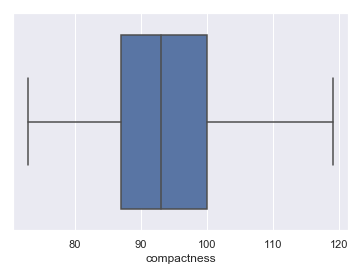

In [24]:
sns.boxplot(Vehicle_df['compactness'])

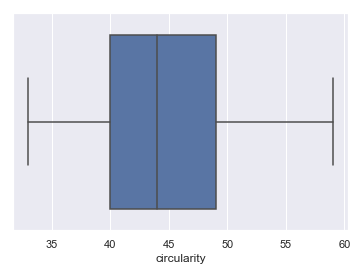

In [25]:
sns.boxplot(Vehicle_df['circularity'])


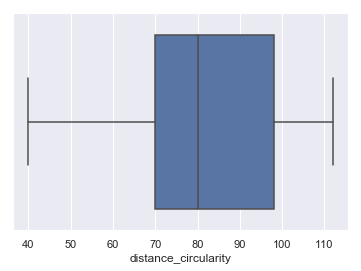

In [26]:
sns.boxplot(Vehicle_df['distance_circularity'])


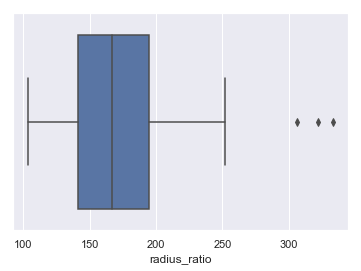

In [27]:
sns.boxplot(Vehicle_df['radius_ratio'])


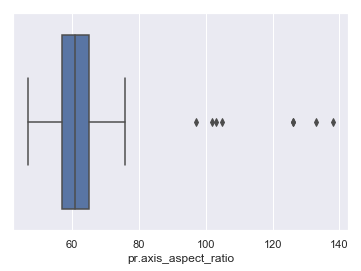

In [28]:
sns.boxplot(Vehicle_df['pr.axis_aspect_ratio'])


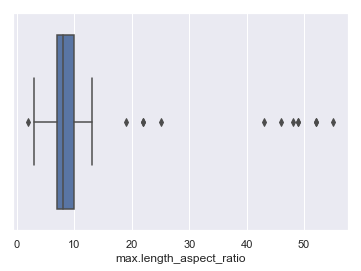

In [29]:
sns.boxplot(Vehicle_df['max.length_aspect_ratio'])


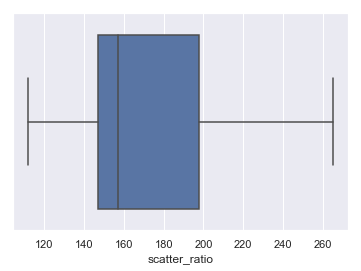

In [30]:
sns.boxplot(Vehicle_df['scatter_ratio'])


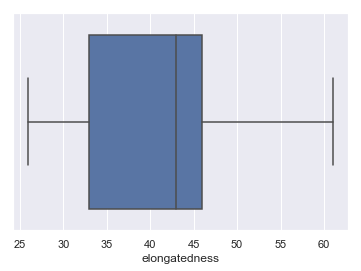

In [31]:
sns.boxplot(Vehicle_df['elongatedness'])


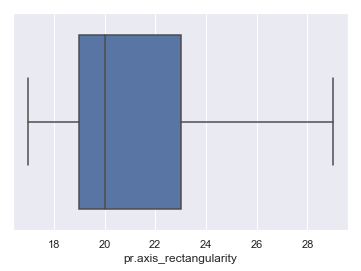

In [32]:
sns.boxplot(Vehicle_df['pr.axis_rectangularity'])


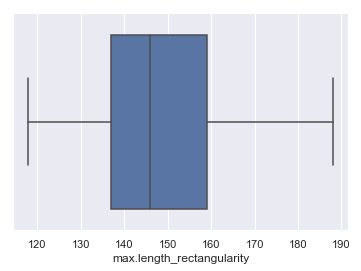

In [33]:
sns.boxplot(Vehicle_df['max.length_rectangularity'])


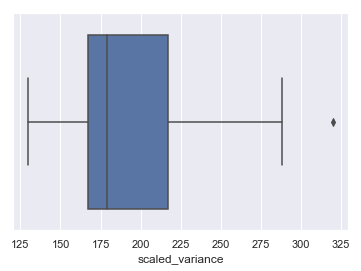

In [34]:
sns.boxplot(Vehicle_df['scaled_variance'])


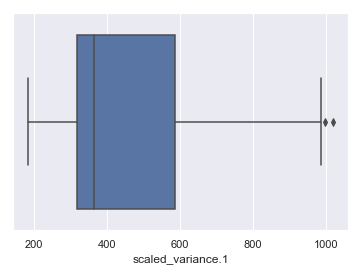

In [35]:
sns.boxplot(Vehicle_df['scaled_variance.1'])


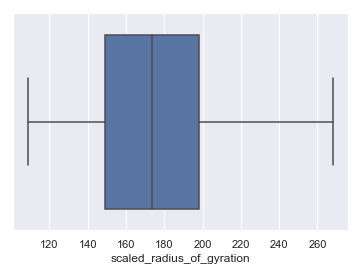

In [36]:
sns.boxplot(Vehicle_df['scaled_radius_of_gyration'])


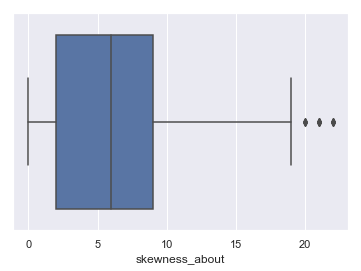

In [37]:
sns.boxplot(Vehicle_df['skewness_about'])


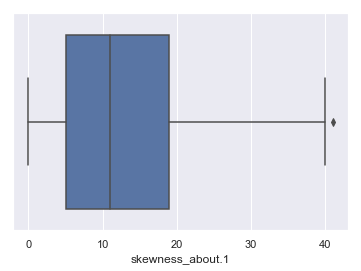

In [38]:
sns.boxplot(Vehicle_df['skewness_about.1'])


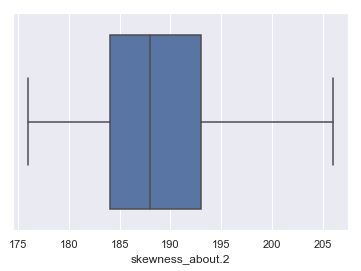

In [39]:
sns.boxplot(Vehicle_df['skewness_about.2'])


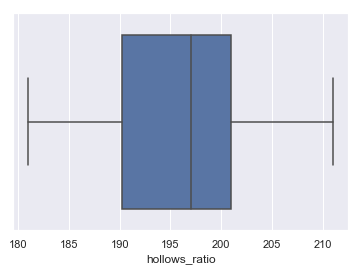

In [40]:
sns.boxplot(Vehicle_df['hollows_ratio'])

##### Outlier Analysis

1. There are no or very few outliers for most of the attributes 

2. For pr.axis_aspect_ratio and max.length_aspect_ratio, there are some outliers, but they can be ignored. 


In [ ]:
# Pair Plot and Correlation Analysis 
# To understand the relation between attributes and their suitability for PCA 

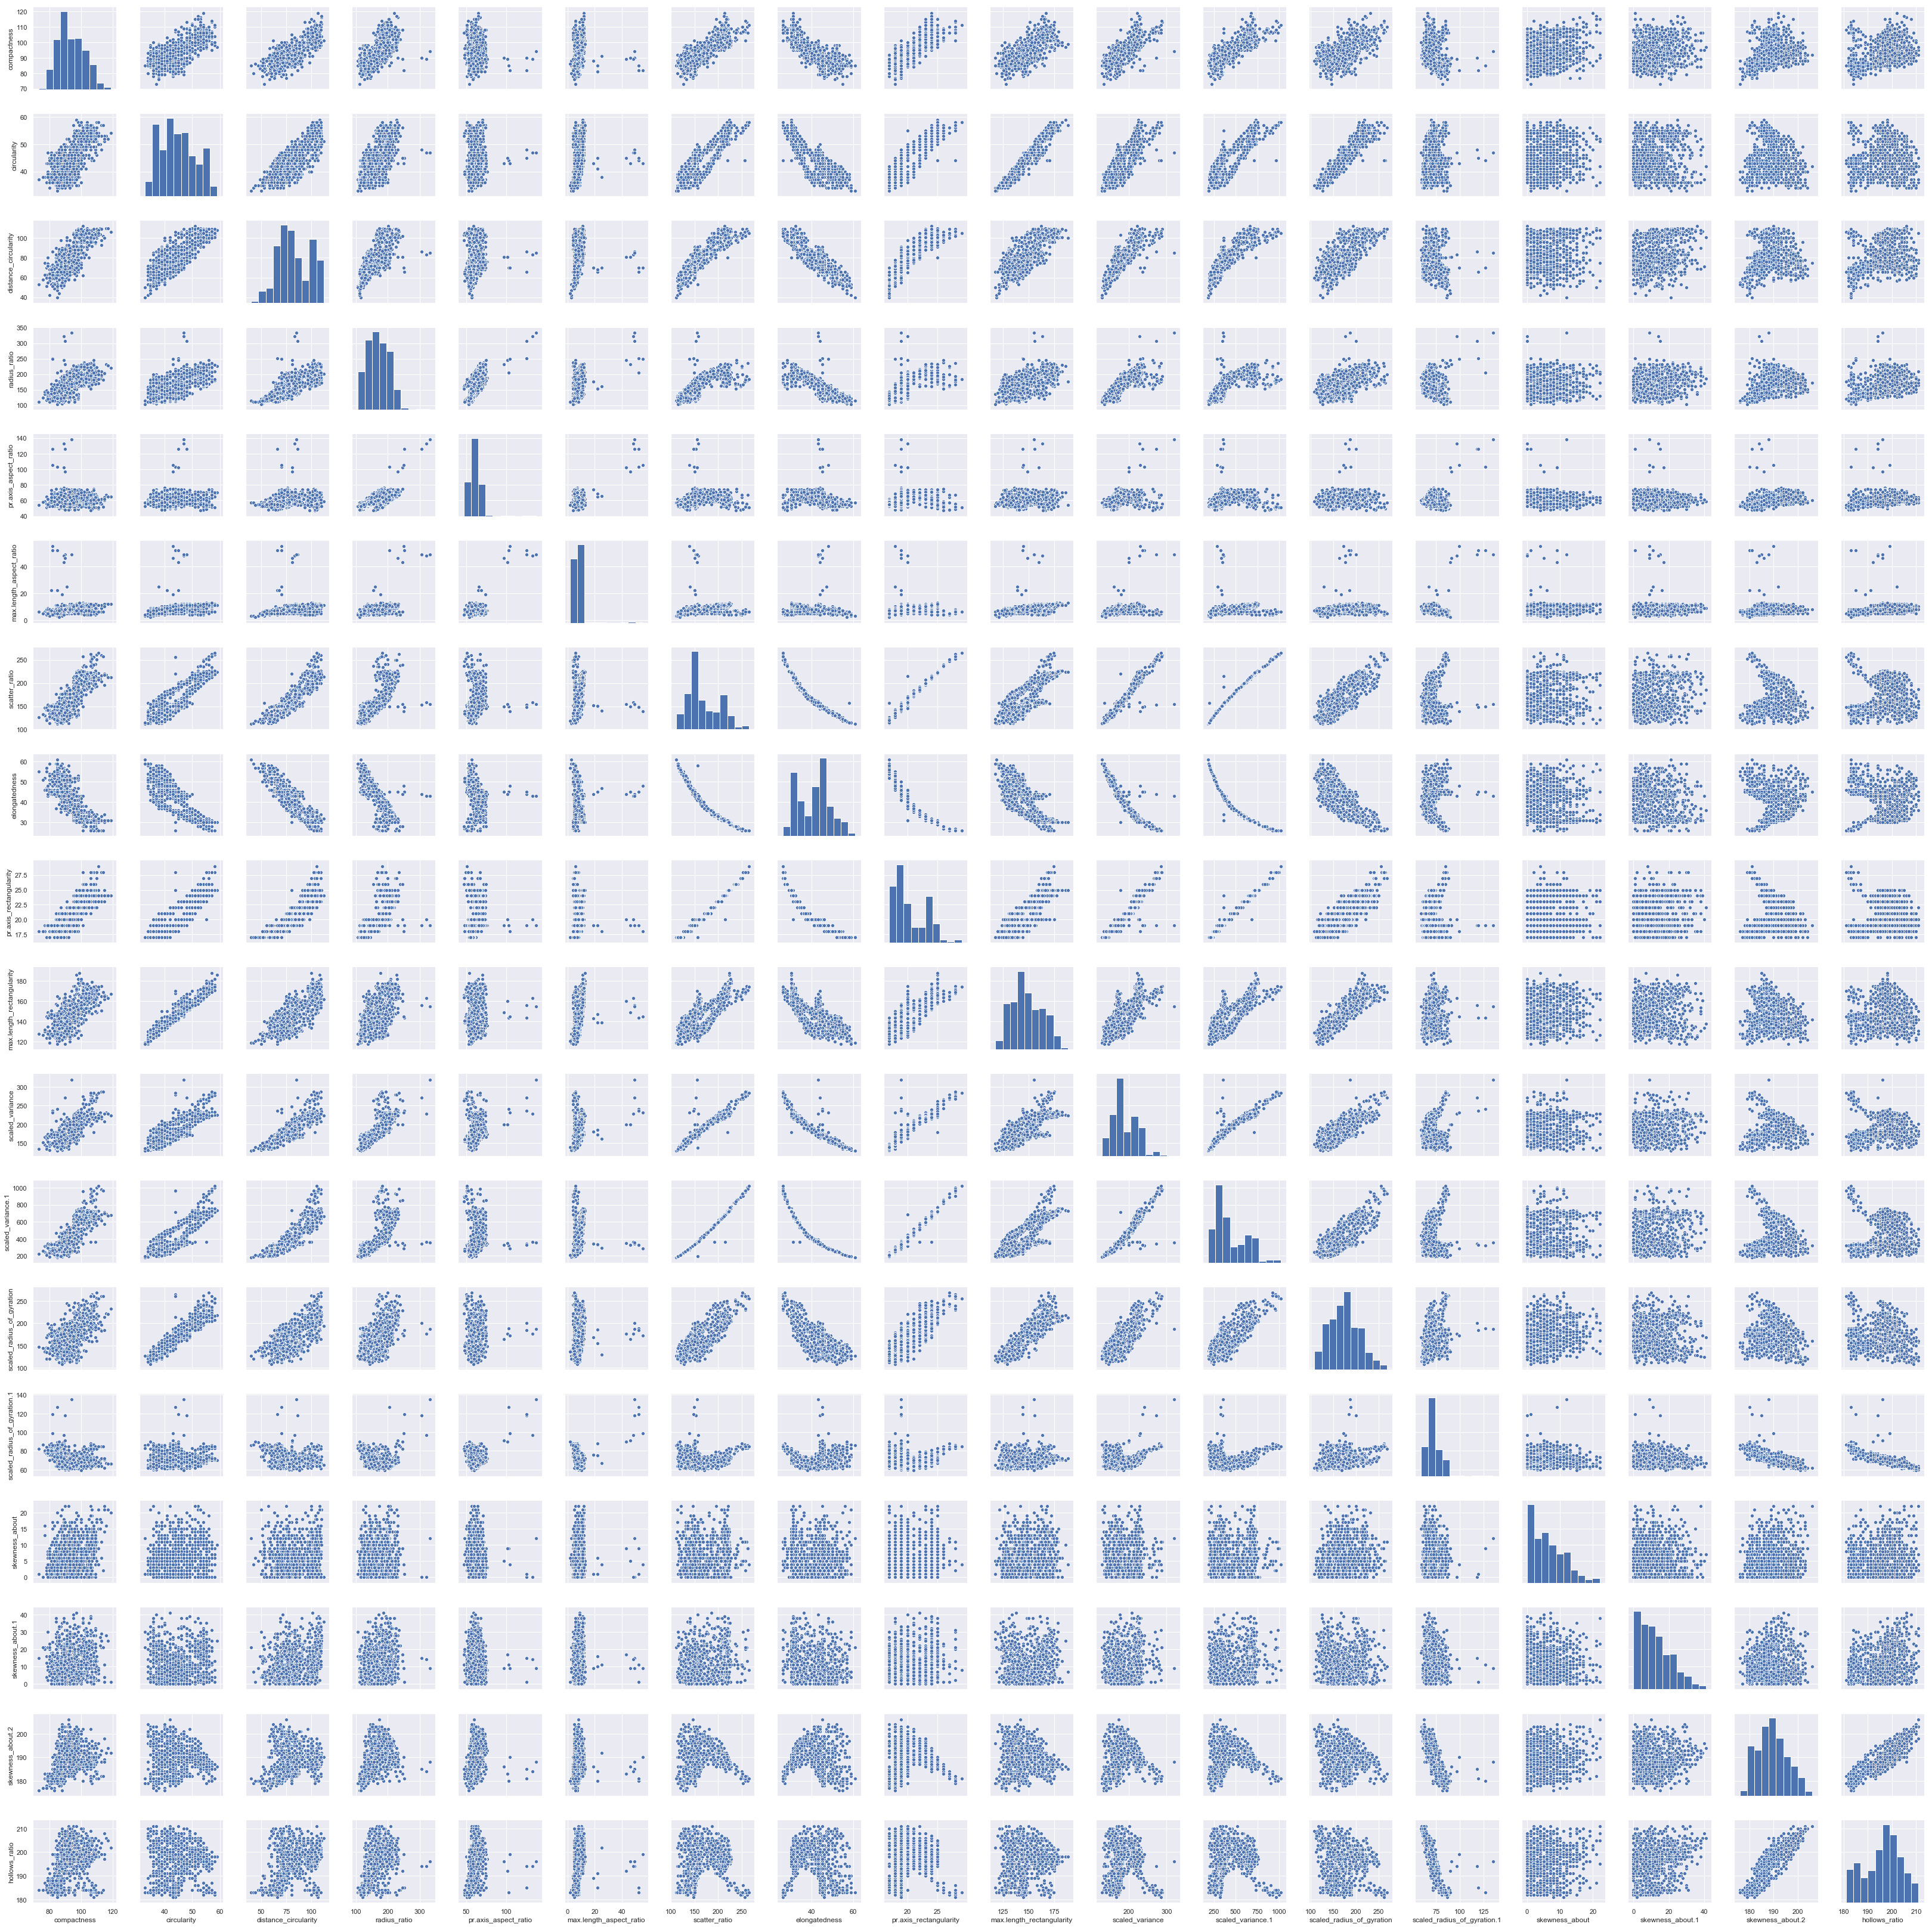

In [41]:
sns.pairplot(Vehicle_df) 

In [42]:
corr = Vehicle_df.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

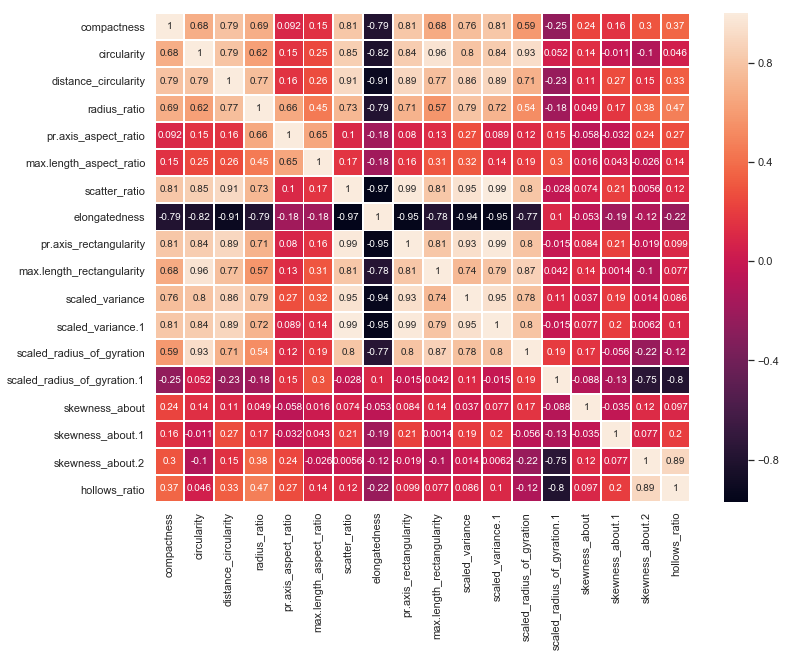

In [43]:
# Plot correlation heat map for better visualisation 
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True,linewidths=1)

##### Inference from Pairplot and Correlation Analysis 

From pair plot and correlation analysis, it can be concluded that 

1. Majority of attributes are highly correlated to each other 

2. Few attributes have low correlation among themselves 

3. PCA will be effective to reduce the dimensionality 


##### Split the dataset into attributes and class:

In [44]:
Vehicle_df_X = Vehicle_df[Vehicle_df.columns[0:18]]
Vehicle_df_y = Vehicle_df["class"]

In [45]:
Vehicle_df_X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [46]:
Vehicle_df_y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

##### Standardize Data

In [47]:
# Use Z scaler to standardize values 
sc = StandardScaler()
X_std =  sc.fit_transform(Vehicle_df_X)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Principal Component Analysis 

##### Covariance Matrix

In [48]:

cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

##### Eigen vectors and Eigen values Processing 

In [49]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [50]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)


[(9.404602609088707, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.0149220585246352, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389688, array([-0.11992248, -0.02482055, -0.05601433,  0.27507421,  0.64201297,
        0.5918013 , -0.09762831,  0.05764844, -0.10951242, -0.0170642 ,
        0.05632398, -0.10884073, -0.03146365,  0.28627701, -0.11567935,
       -0.07528289,  0.00873592,  0.03952427])), (1.1799374684450203, array([ 0.07838436,  0.18733741, -0.07120084, -0.04260534,  0.03272571,
        0.03141473, -0.09574857,  0.0822902 , -0.

In [51]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)


Eigenvalues in descending order: 
[9.404602609088707, 3.0149220585246352, 1.9035250218389688, 1.1799374684450203, 0.9172606328594374, 0.539992628800113, 0.358870117929398, 0.22193245599893438, 0.1606085966351174, 0.091857223395161, 0.06649941176460161, 0.04660059944187697, 0.035794718913039064, 0.027412065737194728, 0.020579287070888717, 0.01791663143223626, 0.010025789847555852, 0.0029644574250446863]


In [52]:
# Find cumulative Eigen values
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained)  
print(cum_var_exp)

[0.52186034 0.68915802 0.79478441 0.86025901 0.9111577  0.94112183
 0.96103549 0.97335049 0.98226265 0.98735979 0.99104984 0.9936357
 0.99562195 0.99714304 0.99828498 0.99927917 0.9998355  1.        ]


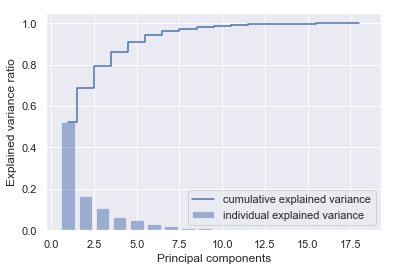

In [53]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

##### Consideration for dimensionality reduction 

1. First 8 Eigen values account for 98.22% of the total variance

2. Rest 10 Eigen values can be discarded 

In [54]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 18 to 8 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

X_std_8D_df = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

##### Verify PCA correlation using Pair Plot

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


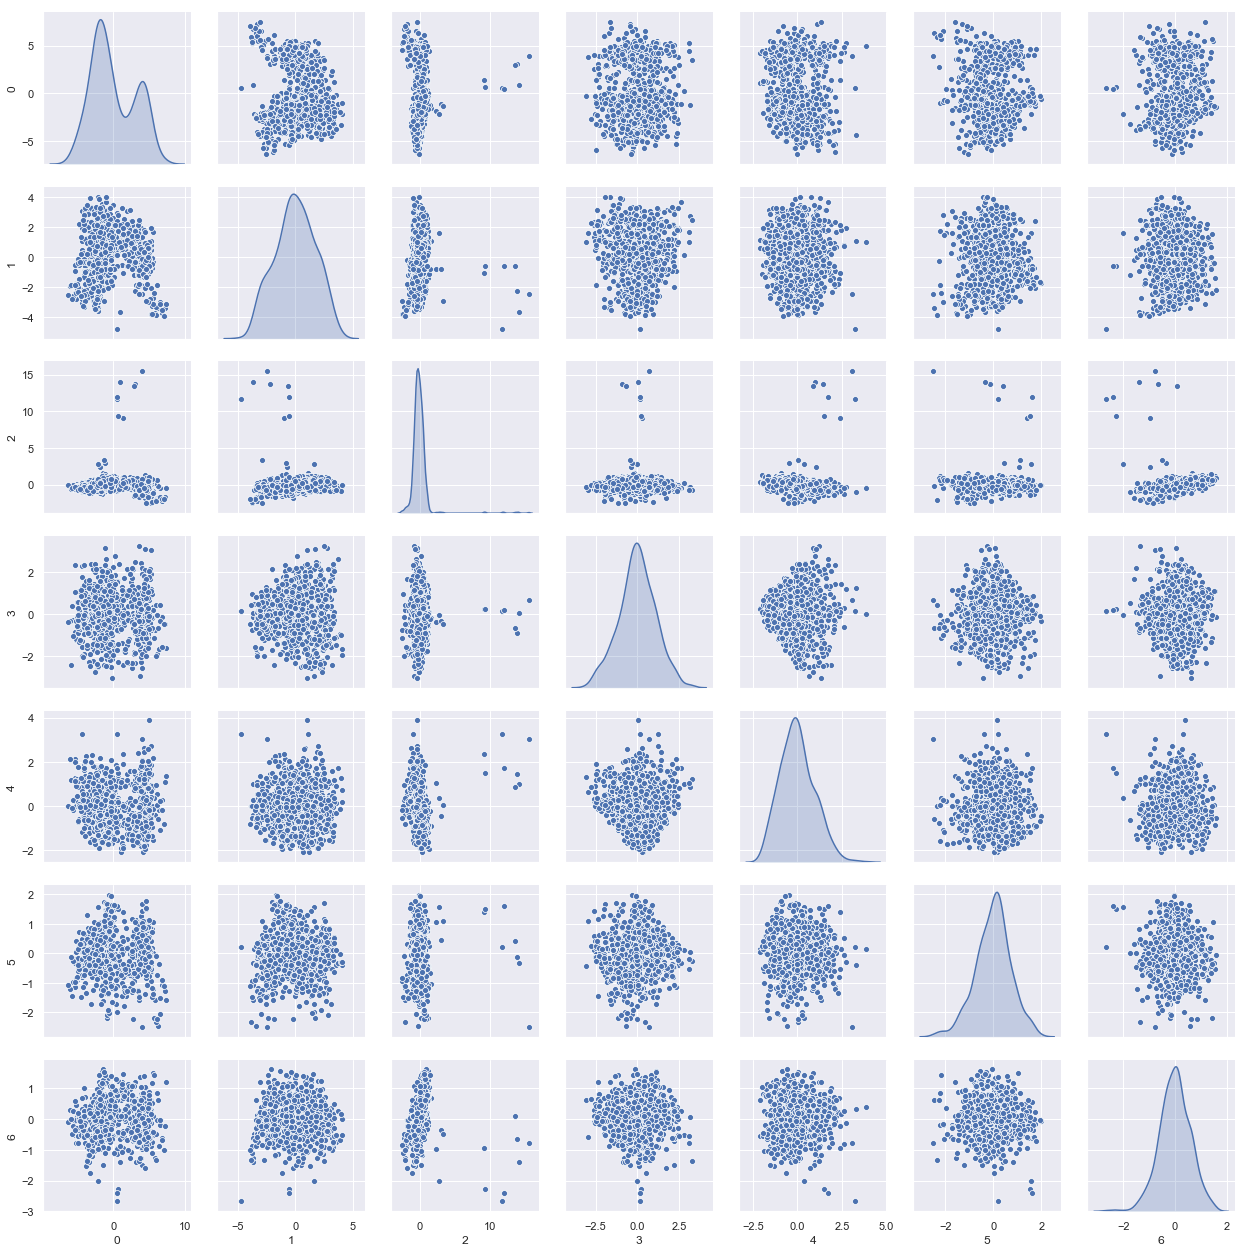

In [55]:
sns.pairplot(X_std_8D_df, diag_kind='kde') 

##### PCA Correlation Conclusion: 

The correlation between the 8 selected principal components is now negligible. 

## Models Building on chosen Principal Components 

##### Training & Test Split

In [57]:
from sklearn import model_selection

test_size = 0.30 # 70:30 training and test set
seed = 365  
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std_8D_df, Vehicle_df_y, test_size=test_size, random_state=seed)

##### Gaussian Naive Bayes Classifier

In [58]:
GB_Classifier = GaussianNB()
GB_Classifier.fit(X_train, y_train)
y_pred = GB_Classifier.predict(X_test)


In [59]:
score  = GB_Classifier.score(X_test,y_test)
print (score)

0.7047244094488189


In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 43,  28,   8],
       [  7, 102,   1],
       [  2,  29,  34]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.83      0.54      0.66        79
         car       0.64      0.93      0.76       110
         van       0.79      0.52      0.63        65

   micro avg       0.70      0.70      0.70       254
   macro avg       0.75      0.66      0.68       254
weighted avg       0.74      0.70      0.69       254



##### Support Vector Classifier Basic

In [62]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [63]:
print(confusion_matrix(y_test,predictions))

[[ 73   4   2]
 [  4 100   6]
 [  3   8  54]]


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         bus       0.91      0.92      0.92        79
         car       0.89      0.91      0.90       110
         van       0.87      0.83      0.85        65

   micro avg       0.89      0.89      0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



##### Support Vector Classifier with Grid Search Cross Validation 

In [65]:
param_grid = [    {'C': [0.01, 0.05, 0.5, 1, 100], 
     'kernel': ['linear','rbf','sigmoid','poly']}    ]

In [66]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train,y_train)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account 

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.7437185929648241, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.7055837563451777, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.6479591836734694, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5376884422110553, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5380710659898477, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5408163265306123, total=   0.0s
[CV] C=0.01, kernel=sigmoid ..........................................
[CV] . C=0.01, k

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

[CV] .. C=0.05, kernel=sigmoid, score=0.583756345177665, total=   0.0s
[CV] C=0.05, kernel=sigmoid ..........................................
[CV] . C=0.05, kernel=sigmoid, score=0.5459183673469388, total=   0.0s
[CV] C=0.05, kernel=poly .............................................
[CV] .... C=0.05, kernel=poly, score=0.6381909547738693, total=   0.0s
[CV] C=0.05, kernel=poly .............................................
[CV] .... C=0.05, kernel=poly, score=0.7106598984771574, total=   0.0s
[CV] C=0.05, kernel=poly .............................................
[CV] .... C=0.05, kernel=poly, score=0.6683673469387755, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.7889447236180904, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8274111675126904, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] .

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

[CV] ...... C=0.5, kernel=rbf, score=0.8826530612244898, total=   0.0s
[CV] C=0.5, kernel=sigmoid ...........................................
[CV] ... C=0.5, kernel=sigmoid, score=0.542713567839196, total=   0.0s
[CV] C=0.5, kernel=sigmoid ...........................................
[CV] .. C=0.5, kernel=sigmoid, score=0.5025380710659898, total=   0.0s
[CV] C=0.5, kernel=sigmoid ...........................................
[CV] .. C=0.5, kernel=sigmoid, score=0.5714285714285714, total=   0.0s
[CV] C=0.5, kernel=poly ..............................................
[CV] ..... C=0.5, kernel=poly, score=0.8140703517587939, total=   0.0s
[CV] C=0.5, kernel=poly ..............................................
[CV] ..... C=0.5, kernel=poly, score=0.8274111675126904, total=   0.0s
[CV] C=0.5, kernel=poly ..............................................
[CV] ..... C=0.5, kernel=poly, score=0.8316326530612245, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

[CV] ........ C=1, kernel=rbf, score=0.9137055837563451, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ......... C=1, kernel=rbf, score=0.923469387755102, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .... C=1, kernel=sigmoid, score=0.5226130653266332, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .... C=1, kernel=sigmoid, score=0.4873096446700508, total=   0.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .... C=1, kernel=sigmoid, score=0.5561224489795918, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ....... C=1, kernel=poly, score=0.8492462311557789, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] ....... C=1, kernel=poly, score=0.8578680203045685, total=   0.0s
[CV] C=1, kernel=poly ................................................
[CV] .

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

[CV] ..... C=100, kernel=poly, score=0.8241206030150754, total=   0.1s
[CV] C=100, kernel=poly ..............................................
[CV] ...... C=100, kernel=poly, score=0.883248730964467, total=   0.1s
[CV] C=100, kernel=poly ..............................................


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=100, kernel=poly, score=0.8571428571428571, total=   0.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1, 100], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [67]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [68]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
grid_predictions = grid.predict(X_test)

In [70]:
print(confusion_matrix(y_test,grid_predictions))

[[ 73   4   2]
 [  4 100   6]
 [  3   8  54]]


In [71]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         bus       0.91      0.92      0.92        79
         car       0.89      0.91      0.90       110
         van       0.87      0.83      0.85        65

   micro avg       0.89      0.89      0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



##### Inference about PCA Dimensionality Reduction and the Best Suited Model 

1. Gaussian Naive Bayes Classifier does not provide a high accuracy. Precision and Recall values are also good. 

2. Support Vector Classifier provides good Score, Precision and Recall values.  

3. Using Grid Search Cross Validation, we can conclude that 
the best performance from Support Vector Classifier is for 'C': 1 and 'kernel': 'rbf'. 
        
4. Precision and Recall values for the best performance are nearly 90%. 

5. Principal Component Analysis technique was able to give good performance even by retaining 
just 8 Principal Components and discarding the rest 10. 
